In [1]:
# Description: Plot Figure S1.
#
# Author:      André Palóczy
# E-mail:      paloczy@gmail.com
# Date:        August/2018

import sys
sys.path.append('../../misc')
sys.path.append('/home/andre/Dropbox/python-modules/pygamman')

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from cmocean.cm import deep
from netCDF4 import Dataset
from local_utils import fmt_isobath

def bmap_antarctica_fig1(ax, resolution='l'):
    m = Basemap(boundinglat=-60,
                lon_0=60,
                projection='spstere',
                resolution=resolution,
                ax=ax)

    m.fillcontinents(color='0.8', zorder=-9)
    m.drawcoastlines(zorder=-8)
    m.drawmapboundary(zorder=-9999)

    return m

#===
plt.close('all')
figsize = (8, 9)

isobs = [500, 1000, 1500, 2500, 3500]
meridians = [-180, -150, -120,  -90,  -60,  -30,    0,   30,   60,   90,  120, 150]
parallels = [-80, -70, -60]

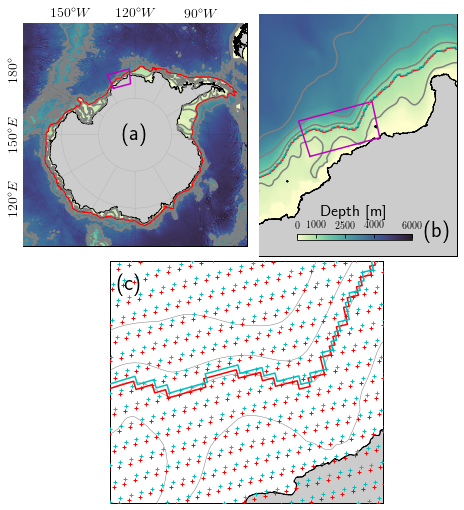

In [2]:
# Load POP topography and isobath points.
head = '../../data_reproduce_figs/'
ftopo = head + 'POP_topog.nc'
fisob = head + 'isobaths.nc'
nc = Dataset(ftopo).variables
lont, latt, ht = nc['TLONG'][:], nc['TLAT'][:], nc['HT'][:]*1e-2
lonu, latu = nc['ULONG'][:], nc['ULAT'][:]
nc = Dataset(fisob)['1000 m isobath (T-points)'].variables
lont_iso, latt_iso = nc['xiso'][:], nc['yiso'][:]
nc = Dataset(fisob)['1000 m isobath (U-points)'].variables
lonu_iso, latu_iso = nc['xiso'][:], nc['yiso'][:]

subpltshp = (2, 2)
fig, ax = plt.subplots(figsize=figsize, nrows=3, ncols=1)
ax1 = plt.subplot2grid(subpltshp, (0, 0), fig=fig, colspan=1)
ax2 = plt.subplot2grid(subpltshp, (0, 1), fig=fig, colspan=1)
ax3 = plt.subplot2grid(subpltshp, (1, 0), fig=fig, colspan=2)

m1 = bmap_antarctica_fig1(ax1, resolution='l')
m2 = bmap_antarctica_fig1(ax2, resolution='f')
m3 = bmap_antarctica_fig1(ax3, resolution='f')

merids1 = m1.drawmeridians(meridians, linewidth=0.1, zorder=9999, labels=[1,0,1,0], fontsize=14)
m1.drawparallels(parallels, linewidth=0.1, zorder=9999, latmax=90)

_ = merids1.pop(-90)
_ = merids1.pop(-120)
_ = merids1.pop(-150)
for merid in merids1:
    try:
        merids1[merid][1][0].set_rotation(90)
    except:
        pass

# Plot T-points and U-points of the isobath.
# Panel (a).
m1.plot(lont_iso, latt_iso, color='r', linewidth=0.7, latlon=True, zorder=99)

# Panel (b).
m2.plot(lont_iso, latt_iso, color='r', linewidth=0.8, latlon=True, zorder=99)
m2.plot(lonu_iso, latu_iso, color='c', linewidth=0.8, latlon=True, zorder=99)

# Panel (c).
m3.plot(lont_iso, latt_iso, color='r', latlon=True, zorder=99)
m3.plot(lonu_iso, latu_iso, color='c', latlon=True, zorder=99)

nsx, nsy = 2, 2
lonts, latts = lont[::nsy, ::nsx], latt[::nsy, ::nsx]
lonus, latus = lonu[::nsy, ::nsx], latu[::nsy, ::nsx]
m3.plot(lonts, latts, linestyle='none', marker='+', ms=4, mfc='r', mec='r', latlon=True)
m3.plot(lonus, latus, linestyle='none', marker='+', ms=4, mfc='c', mec='c', latlon=True)

cbtks = [0, 1000, 2500, 4000, 6000]
cw, ch = 0.20, 0.01
xcb, ycb = 0.6, 0.53
cbax = fig.add_axes([xcb, ycb, cw, ch])

htmin, htmax = cbtks[0], cbtks[-1]
cs = m1.pcolormesh(lont, latt, ht, vmin=htmin, vmax=htmax, cmap=deep, latlon=True, zorder=-9)
m2.pcolormesh(lont, latt, ht, vmin=htmin, vmax=htmax, cmap=deep, latlon=True, zorder=-9)
# m3.pcolormesh(lont, latt, ht, vmin=htmin, vmax=htmax, cmap=deep, latlon=True, zorder=-9)
m1.contour(lont, latt, ht, isobs, colors='gray', latlon=True, zorder=-8)
m2.contour(lont, latt, ht, isobs, colors='gray', latlon=True, zorder=-8)
cc3 = m3.contour(lont, latt, ht, isobs, colors='gray', linewidths=0.5, latlon=True, zorder=-8)
# fmt_isobath(cc3, manual=False)

# Zoom in smaller areas on panels (b) and (c).
llx, urx = -145, -125
lly, ury = -76, -72
xmi, ymi = m2(llx, lly)
xma, yma = m2(urx, ury)
ax2.set_xlim([xmi, xma])
ax2.set_ylim([ymi, yma])
m1.plot([llx, urx, urx, llx, llx], [lly, lly, ury, ury, lly], color='m', latlon=True)
cb = plt.colorbar(cs, ax=ax3, cax=cbax, orientation='horizontal')
cb.set_ticks(cbtks)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')
cb.set_label(r'Depth [m]', fontweight='black', fontsize=16, labelpad=5)

xm, ym = 0.5*(llx + urx), 0.5*(lly + ury)
dly = 0.4
dlx = 2*dly/np.cos(ym*np.pi/180)
llx, urx = xm-dlx, xm+dlx
lly, ury = ym-dly, ym+dly
xmi, ymi = m3(llx, lly)
xma, yma = m3(urx, ury)
ax3.set_xlim([xmi, xma])
ax3.set_ylim([ymi, yma])
m2.plot([llx, urx, urx, llx, llx], [lly, lly, ury, ury, lly], color='m', latlon=True)

xlettera, ylettera = 0.5, 0.5
xletterb, yletterb = 0.9, 0.1
xletterc, yletterc = 0.07, 0.9
ax1.text(xlettera, ylettera, r'(a)', fontsize=22, fontweight='black', ha='center', va='center', transform=ax1.transAxes)
ax2.text(xletterb, yletterb, r'(b)', fontsize=22, fontweight='black', ha='center', va='center', transform=ax2.transAxes)
ax3.text(xletterc, yletterc, r'(c)', fontsize=22, fontweight='black', ha='center', va='center', transform=ax3.transAxes)

fig.subplots_adjust(wspace=0.0, hspace=0.02)

In [3]:
plt.draw()
fig.show()
fig.savefig('figS1.png', bbox_inches='tight', pad_inches=0.05, dpi=150)

<Figure size 432x288 with 0 Axes>